In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

sys.path.append("src")

from optimization.grid_search import ParameterGridSearch 
from optimization.model_optimization import ProfileOptimizer, ModelParameterOptimizer
from model.semi_batch import SemiBatchReactor
from optimization.utils import build_F

gs = ParameterGridSearch(lb=[0.15, 0.15], ub=[0.5, 0.6], N = 50)
model_ideal = SemiBatchReactor()
model = SemiBatchReactor(k=[0.053, 0.128, 0.0, 0.0, 5])

In [2]:
# Get the fixed model inputs
# TODO: read from DB
opt = ProfileOptimizer()
_, F, _ = opt.Run(model)
samples = model_ideal.GetSamples(F, [0.95,0.97,0.99], noise=False)
samples_noisy = model_ideal.GetSamples(F, [0.95,0.97,0.99], noise=True)

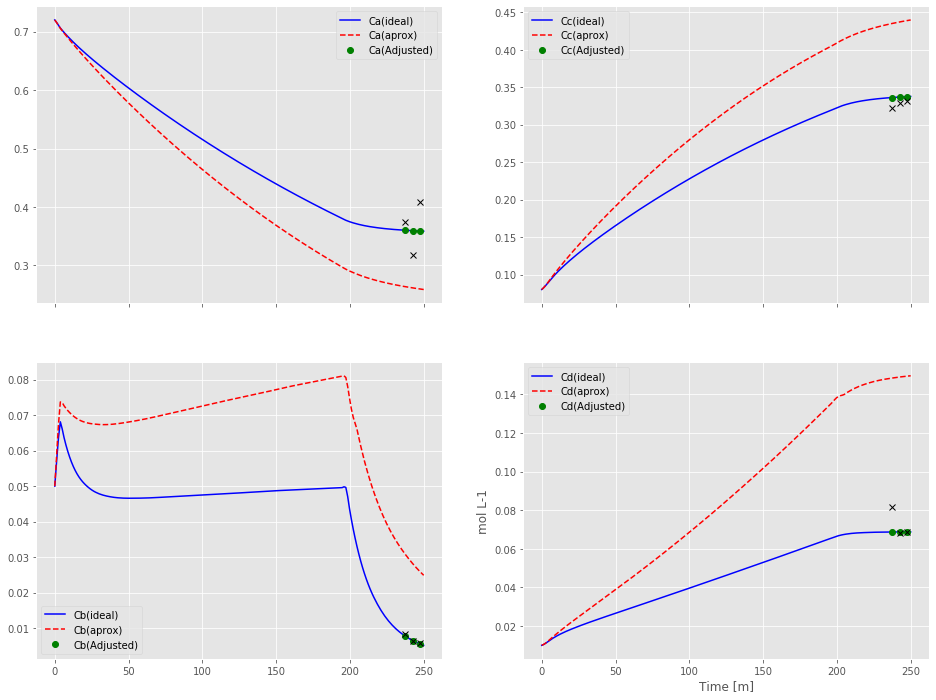

In [3]:
# Plot the process information
# Simulate the solution found
sim_ideal = model_ideal.Simulate(F)
sim_aprox = model.Simulate(F)

# Build the input signal F
F_ideal = build_F(sim_ideal.t, F)
F_aprox = build_F(sim_aprox.t, F)

# Plot the optimal simulation profiles
fig, (ax1, ax2) = plt.subplots(2, 2, sharex=True, figsize=(16,12))

ax1[0].plot(sim_ideal.t, sim_ideal.y[0], 'b')
ax1[0].plot(sim_aprox.t, sim_aprox.y[0], 'r--')
ax1[0].plot(np.array(list(samples.keys())) * 250, np.array(list(samples.values()))[:,0], 'go')
ax1[0].plot(np.array(list(samples_noisy.keys())) * 250, np.array(list(samples_noisy.values()))[:,0], 'kx')
ax1[0].legend(['Ca(ideal)','Ca(aprox)','Ca(Adjusted)'])

ax1[1].plot(sim_ideal.t, sim_ideal.y[2], 'b')
ax1[1].plot(sim_aprox.t, sim_aprox.y[2], 'r--')
ax1[1].plot(np.array(list(samples.keys())) * 250, np.array(list(samples.values()))[:,2], 'go')
ax1[1].plot(np.array(list(samples_noisy.keys())) * 250, np.array(list(samples_noisy.values()))[:,2], 'kx')
ax1[1].legend(['Cc(ideal)','Cc(aprox)','Cc(Adjusted)'])

ax2[0].plot(sim_ideal.t, sim_ideal.y[1], 'b')
ax2[0].plot(sim_aprox.t, sim_aprox.y[1], 'r--')
ax2[0].plot(np.array(list(samples.keys())) * 250, np.array(list(samples.values()))[:,1], 'go')
ax2[0].plot(np.array(list(samples_noisy.keys())) * 250, np.array(list(samples_noisy.values()))[:,1], 'kx')
ax2[0].legend(['Cb(ideal)','Cb(aprox)','Cb(Adjusted)'])

ax2[1].plot(sim_ideal.t, sim_ideal.y[3], 'b')
ax2[1].plot(sim_aprox.t, sim_aprox.y[3], 'r--')
ax2[1].plot(np.array(list(samples.keys())) * 250, np.array(list(samples.values()))[:,3], 'go')
ax2[1].plot(np.array(list(samples_noisy.keys())) * 250, np.array(list(samples_noisy.values()))[:,3], 'kx')
ax2[1].legend(['Cd(ideal)','Cd(aprox)','Cd(Adjusted)'])

plt.xlabel('Time [m]')
plt.ylabel('mol L-1')
plt.show()


In [4]:
# Run grid search
grid, results = gs.run(model, F, samples)
grid_noisy, results_noisy = gs.run(model, F, samples_noisy)

Iter: 0-0/50-50
Iter: 0-1/50-50
Iter: 0-2/50-50
Iter: 0-3/50-50
Iter: 0-4/50-50
Iter: 0-5/50-50
Iter: 0-6/50-50
Iter: 0-7/50-50
Iter: 0-8/50-50
Iter: 0-9/50-50
Iter: 0-10/50-50
Iter: 0-11/50-50
Iter: 0-12/50-50
Iter: 0-13/50-50
Iter: 0-14/50-50
Iter: 0-15/50-50
Iter: 0-16/50-50
Iter: 0-17/50-50
Iter: 0-18/50-50
Iter: 0-19/50-50
Iter: 0-20/50-50
Iter: 0-21/50-50
Iter: 0-22/50-50
Iter: 0-23/50-50
Iter: 0-24/50-50
Iter: 0-25/50-50
Iter: 0-26/50-50
Iter: 0-27/50-50
Iter: 0-28/50-50
Iter: 0-29/50-50
Iter: 0-30/50-50
Iter: 0-31/50-50
Iter: 0-32/50-50
Iter: 0-33/50-50
Iter: 0-34/50-50
Iter: 0-35/50-50
Iter: 0-36/50-50
Iter: 0-37/50-50
Iter: 0-38/50-50
Iter: 0-39/50-50
Iter: 0-40/50-50
Iter: 0-41/50-50
Iter: 0-42/50-50
Iter: 0-43/50-50
Iter: 0-44/50-50
Iter: 0-45/50-50
Iter: 0-46/50-50
Iter: 0-47/50-50
Iter: 0-48/50-50
Iter: 0-49/50-50
Iter: 1-0/50-50
Iter: 1-1/50-50
Iter: 1-2/50-50
Iter: 1-3/50-50
Iter: 1-4/50-50
Iter: 1-5/50-50
Iter: 1-6/50-50
Iter: 1-7/50-50
Iter: 1-8/50-50
Iter: 1-9/50-50


Iter: 10-2/50-50
Iter: 10-3/50-50
Iter: 10-4/50-50
Iter: 10-5/50-50
Iter: 10-6/50-50
Iter: 10-7/50-50
Iter: 10-8/50-50
Iter: 10-9/50-50
Iter: 10-10/50-50
Iter: 10-11/50-50
Iter: 10-12/50-50
Iter: 10-13/50-50
Iter: 10-14/50-50
Iter: 10-15/50-50
Iter: 10-16/50-50
Iter: 10-17/50-50
Iter: 10-18/50-50
Iter: 10-19/50-50
Iter: 10-20/50-50
Iter: 10-21/50-50
Iter: 10-22/50-50
Iter: 10-23/50-50
Iter: 10-24/50-50
Iter: 10-25/50-50
Iter: 10-26/50-50
Iter: 10-27/50-50
Iter: 10-28/50-50
Iter: 10-29/50-50
Iter: 10-30/50-50
Iter: 10-31/50-50
Iter: 10-32/50-50
Iter: 10-33/50-50
Iter: 10-34/50-50
Iter: 10-35/50-50
Iter: 10-36/50-50
Iter: 10-37/50-50
Iter: 10-38/50-50
Iter: 10-39/50-50
Iter: 10-40/50-50
Iter: 10-41/50-50
Iter: 10-42/50-50
Iter: 10-43/50-50
Iter: 10-44/50-50
Iter: 10-45/50-50
Iter: 10-46/50-50
Iter: 10-47/50-50
Iter: 10-48/50-50
Iter: 10-49/50-50
Iter: 11-0/50-50
Iter: 11-1/50-50
Iter: 11-2/50-50
Iter: 11-3/50-50
Iter: 11-4/50-50
Iter: 11-5/50-50
Iter: 11-6/50-50
Iter: 11-7/50-50
Iter: 11

Iter: 19-39/50-50
Iter: 19-40/50-50
Iter: 19-41/50-50
Iter: 19-42/50-50
Iter: 19-43/50-50
Iter: 19-44/50-50
Iter: 19-45/50-50
Iter: 19-46/50-50
Iter: 19-47/50-50
Iter: 19-48/50-50
Iter: 19-49/50-50
Iter: 20-0/50-50
Iter: 20-1/50-50
Iter: 20-2/50-50
Iter: 20-3/50-50
Iter: 20-4/50-50
Iter: 20-5/50-50
Iter: 20-6/50-50
Iter: 20-7/50-50
Iter: 20-8/50-50
Iter: 20-9/50-50
Iter: 20-10/50-50
Iter: 20-11/50-50
Iter: 20-12/50-50
Iter: 20-13/50-50
Iter: 20-14/50-50
Iter: 20-15/50-50
Iter: 20-16/50-50
Iter: 20-17/50-50
Iter: 20-18/50-50
Iter: 20-19/50-50
Iter: 20-20/50-50
Iter: 20-21/50-50
Iter: 20-22/50-50
Iter: 20-23/50-50
Iter: 20-24/50-50
Iter: 20-25/50-50
Iter: 20-26/50-50
Iter: 20-27/50-50
Iter: 20-28/50-50
Iter: 20-29/50-50
Iter: 20-30/50-50
Iter: 20-31/50-50
Iter: 20-32/50-50
Iter: 20-33/50-50
Iter: 20-34/50-50
Iter: 20-35/50-50
Iter: 20-36/50-50
Iter: 20-37/50-50
Iter: 20-38/50-50
Iter: 20-39/50-50
Iter: 20-40/50-50
Iter: 20-41/50-50
Iter: 20-42/50-50
Iter: 20-43/50-50
Iter: 20-44/50-50
It

Iter: 29-12/50-50
Iter: 29-13/50-50
Iter: 29-14/50-50
Iter: 29-15/50-50
Iter: 29-16/50-50
Iter: 29-17/50-50
Iter: 29-18/50-50
Iter: 29-19/50-50
Iter: 29-20/50-50
Iter: 29-21/50-50
Iter: 29-22/50-50
Iter: 29-23/50-50
Iter: 29-24/50-50
Iter: 29-25/50-50
Iter: 29-26/50-50
Iter: 29-27/50-50
Iter: 29-28/50-50
Iter: 29-29/50-50
Iter: 29-30/50-50
Iter: 29-31/50-50
Iter: 29-32/50-50
Iter: 29-33/50-50
Iter: 29-34/50-50
Iter: 29-35/50-50
Iter: 29-36/50-50
Iter: 29-37/50-50
Iter: 29-38/50-50
Iter: 29-39/50-50
Iter: 29-40/50-50
Iter: 29-41/50-50
Iter: 29-42/50-50
Iter: 29-43/50-50
Iter: 29-44/50-50
Iter: 29-45/50-50
Iter: 29-46/50-50
Iter: 29-47/50-50
Iter: 29-48/50-50
Iter: 29-49/50-50
Iter: 30-0/50-50
Iter: 30-1/50-50
Iter: 30-2/50-50
Iter: 30-3/50-50
Iter: 30-4/50-50
Iter: 30-5/50-50
Iter: 30-6/50-50
Iter: 30-7/50-50
Iter: 30-8/50-50
Iter: 30-9/50-50
Iter: 30-10/50-50
Iter: 30-11/50-50
Iter: 30-12/50-50
Iter: 30-13/50-50
Iter: 30-14/50-50
Iter: 30-15/50-50
Iter: 30-16/50-50
Iter: 30-17/50-50
It

Iter: 38-42/50-50
Iter: 38-43/50-50
Iter: 38-44/50-50
Iter: 38-45/50-50
Iter: 38-46/50-50
Iter: 38-47/50-50
Iter: 38-48/50-50
Iter: 38-49/50-50
Iter: 39-0/50-50
Iter: 39-1/50-50
Iter: 39-2/50-50
Iter: 39-3/50-50
Iter: 39-4/50-50
Iter: 39-5/50-50
Iter: 39-6/50-50
Iter: 39-7/50-50
Iter: 39-8/50-50
Iter: 39-9/50-50
Iter: 39-10/50-50
Iter: 39-11/50-50
Iter: 39-12/50-50
Iter: 39-13/50-50
Iter: 39-14/50-50
Iter: 39-15/50-50
Iter: 39-16/50-50
Iter: 39-17/50-50
Iter: 39-18/50-50
Iter: 39-19/50-50
Iter: 39-20/50-50
Iter: 39-21/50-50
Iter: 39-22/50-50
Iter: 39-23/50-50
Iter: 39-24/50-50
Iter: 39-25/50-50
Iter: 39-26/50-50
Iter: 39-27/50-50
Iter: 39-28/50-50
Iter: 39-29/50-50
Iter: 39-30/50-50
Iter: 39-31/50-50
Iter: 39-32/50-50
Iter: 39-33/50-50
Iter: 39-34/50-50
Iter: 39-35/50-50
Iter: 39-36/50-50
Iter: 39-37/50-50
Iter: 39-38/50-50
Iter: 39-39/50-50
Iter: 39-40/50-50
Iter: 39-41/50-50
Iter: 39-42/50-50
Iter: 39-43/50-50
Iter: 39-44/50-50
Iter: 39-45/50-50
Iter: 39-46/50-50
Iter: 39-47/50-50
It

Iter: 48-29/50-50
Iter: 48-30/50-50
Iter: 48-31/50-50
Iter: 48-32/50-50
Iter: 48-33/50-50
Iter: 48-34/50-50
Iter: 48-35/50-50
Iter: 48-36/50-50
Iter: 48-37/50-50
Iter: 48-38/50-50
Iter: 48-39/50-50
Iter: 48-40/50-50
Iter: 48-41/50-50
Iter: 48-42/50-50
Iter: 48-43/50-50
Iter: 48-44/50-50
Iter: 48-45/50-50
Iter: 48-46/50-50
Iter: 48-47/50-50
Iter: 48-48/50-50
Iter: 48-49/50-50
Iter: 49-0/50-50
Iter: 49-1/50-50
Iter: 49-2/50-50
Iter: 49-3/50-50
Iter: 49-4/50-50
Iter: 49-5/50-50
Iter: 49-6/50-50
Iter: 49-7/50-50
Iter: 49-8/50-50
Iter: 49-9/50-50
Iter: 49-10/50-50
Iter: 49-11/50-50
Iter: 49-12/50-50
Iter: 49-13/50-50
Iter: 49-14/50-50
Iter: 49-15/50-50
Iter: 49-16/50-50
Iter: 49-17/50-50
Iter: 49-18/50-50
Iter: 49-19/50-50
Iter: 49-20/50-50
Iter: 49-21/50-50
Iter: 49-22/50-50
Iter: 49-23/50-50
Iter: 49-24/50-50
Iter: 49-25/50-50
Iter: 49-26/50-50
Iter: 49-27/50-50
Iter: 49-28/50-50
Iter: 49-29/50-50
Iter: 49-30/50-50
Iter: 49-31/50-50
Iter: 49-32/50-50
Iter: 49-33/50-50
Iter: 49-34/50-50
It

Iter: 8-24/50-50
Iter: 8-25/50-50
Iter: 8-26/50-50
Iter: 8-27/50-50
Iter: 8-28/50-50
Iter: 8-29/50-50
Iter: 8-30/50-50
Iter: 8-31/50-50
Iter: 8-32/50-50
Iter: 8-33/50-50
Iter: 8-34/50-50
Iter: 8-35/50-50
Iter: 8-36/50-50
Iter: 8-37/50-50
Iter: 8-38/50-50
Iter: 8-39/50-50
Iter: 8-40/50-50
Iter: 8-41/50-50
Iter: 8-42/50-50
Iter: 8-43/50-50
Iter: 8-44/50-50
Iter: 8-45/50-50
Iter: 8-46/50-50
Iter: 8-47/50-50
Iter: 8-48/50-50
Iter: 8-49/50-50
Iter: 9-0/50-50
Iter: 9-1/50-50
Iter: 9-2/50-50
Iter: 9-3/50-50
Iter: 9-4/50-50
Iter: 9-5/50-50
Iter: 9-6/50-50
Iter: 9-7/50-50
Iter: 9-8/50-50
Iter: 9-9/50-50
Iter: 9-10/50-50
Iter: 9-11/50-50
Iter: 9-12/50-50
Iter: 9-13/50-50
Iter: 9-14/50-50
Iter: 9-15/50-50
Iter: 9-16/50-50
Iter: 9-17/50-50
Iter: 9-18/50-50
Iter: 9-19/50-50
Iter: 9-20/50-50
Iter: 9-21/50-50
Iter: 9-22/50-50
Iter: 9-23/50-50
Iter: 9-24/50-50
Iter: 9-25/50-50
Iter: 9-26/50-50
Iter: 9-27/50-50
Iter: 9-28/50-50
Iter: 9-29/50-50
Iter: 9-30/50-50
Iter: 9-31/50-50
Iter: 9-32/50-50
Iter: 9

Iter: 18-16/50-50
Iter: 18-17/50-50
Iter: 18-18/50-50
Iter: 18-19/50-50
Iter: 18-20/50-50
Iter: 18-21/50-50
Iter: 18-22/50-50
Iter: 18-23/50-50
Iter: 18-24/50-50
Iter: 18-25/50-50
Iter: 18-26/50-50
Iter: 18-27/50-50
Iter: 18-28/50-50
Iter: 18-29/50-50
Iter: 18-30/50-50
Iter: 18-31/50-50
Iter: 18-32/50-50
Iter: 18-33/50-50
Iter: 18-34/50-50
Iter: 18-35/50-50
Iter: 18-36/50-50
Iter: 18-37/50-50
Iter: 18-38/50-50
Iter: 18-39/50-50
Iter: 18-40/50-50
Iter: 18-41/50-50
Iter: 18-42/50-50
Iter: 18-43/50-50
Iter: 18-44/50-50
Iter: 18-45/50-50
Iter: 18-46/50-50
Iter: 18-47/50-50
Iter: 18-48/50-50
Iter: 18-49/50-50
Iter: 19-0/50-50
Iter: 19-1/50-50
Iter: 19-2/50-50
Iter: 19-3/50-50
Iter: 19-4/50-50
Iter: 19-5/50-50
Iter: 19-6/50-50
Iter: 19-7/50-50
Iter: 19-8/50-50
Iter: 19-9/50-50
Iter: 19-10/50-50
Iter: 19-11/50-50
Iter: 19-12/50-50
Iter: 19-13/50-50
Iter: 19-14/50-50
Iter: 19-15/50-50
Iter: 19-16/50-50
Iter: 19-17/50-50
Iter: 19-18/50-50
Iter: 19-19/50-50
Iter: 19-20/50-50
Iter: 19-21/50-50
It

Iter: 27-45/50-50
Iter: 27-46/50-50
Iter: 27-47/50-50
Iter: 27-48/50-50
Iter: 27-49/50-50
Iter: 28-0/50-50
Iter: 28-1/50-50
Iter: 28-2/50-50
Iter: 28-3/50-50
Iter: 28-4/50-50
Iter: 28-5/50-50
Iter: 28-6/50-50
Iter: 28-7/50-50
Iter: 28-8/50-50
Iter: 28-9/50-50
Iter: 28-10/50-50
Iter: 28-11/50-50
Iter: 28-12/50-50
Iter: 28-13/50-50
Iter: 28-14/50-50
Iter: 28-15/50-50
Iter: 28-16/50-50
Iter: 28-17/50-50
Iter: 28-18/50-50
Iter: 28-19/50-50
Iter: 28-20/50-50
Iter: 28-21/50-50
Iter: 28-22/50-50
Iter: 28-23/50-50
Iter: 28-24/50-50
Iter: 28-25/50-50
Iter: 28-26/50-50
Iter: 28-27/50-50
Iter: 28-28/50-50
Iter: 28-29/50-50
Iter: 28-30/50-50
Iter: 28-31/50-50
Iter: 28-32/50-50
Iter: 28-33/50-50
Iter: 28-34/50-50
Iter: 28-35/50-50
Iter: 28-36/50-50
Iter: 28-37/50-50
Iter: 28-38/50-50
Iter: 28-39/50-50
Iter: 28-40/50-50
Iter: 28-41/50-50
Iter: 28-42/50-50
Iter: 28-43/50-50
Iter: 28-44/50-50
Iter: 28-45/50-50
Iter: 28-46/50-50
Iter: 28-47/50-50
Iter: 28-48/50-50
Iter: 28-49/50-50
Iter: 29-0/50-50
Ite

Iter: 37-15/50-50
Iter: 37-16/50-50
Iter: 37-17/50-50
Iter: 37-18/50-50
Iter: 37-19/50-50
Iter: 37-20/50-50
Iter: 37-21/50-50
Iter: 37-22/50-50
Iter: 37-23/50-50
Iter: 37-24/50-50
Iter: 37-25/50-50
Iter: 37-26/50-50
Iter: 37-27/50-50
Iter: 37-28/50-50
Iter: 37-29/50-50
Iter: 37-30/50-50
Iter: 37-31/50-50
Iter: 37-32/50-50
Iter: 37-33/50-50
Iter: 37-34/50-50
Iter: 37-35/50-50
Iter: 37-36/50-50
Iter: 37-37/50-50
Iter: 37-38/50-50
Iter: 37-39/50-50
Iter: 37-40/50-50
Iter: 37-41/50-50
Iter: 37-42/50-50
Iter: 37-43/50-50
Iter: 37-44/50-50
Iter: 37-45/50-50
Iter: 37-46/50-50
Iter: 37-47/50-50
Iter: 37-48/50-50
Iter: 37-49/50-50
Iter: 38-0/50-50
Iter: 38-1/50-50
Iter: 38-2/50-50
Iter: 38-3/50-50
Iter: 38-4/50-50
Iter: 38-5/50-50
Iter: 38-6/50-50
Iter: 38-7/50-50
Iter: 38-8/50-50
Iter: 38-9/50-50
Iter: 38-10/50-50
Iter: 38-11/50-50
Iter: 38-12/50-50
Iter: 38-13/50-50
Iter: 38-14/50-50
Iter: 38-15/50-50
Iter: 38-16/50-50
Iter: 38-17/50-50
Iter: 38-18/50-50
Iter: 38-19/50-50
Iter: 38-20/50-50
It

Iter: 46-27/50-50
Iter: 46-28/50-50
Iter: 46-29/50-50
Iter: 46-30/50-50
Iter: 46-31/50-50
Iter: 46-32/50-50
Iter: 46-33/50-50
Iter: 46-34/50-50
Iter: 46-35/50-50
Iter: 46-36/50-50
Iter: 46-37/50-50
Iter: 46-38/50-50
Iter: 46-39/50-50
Iter: 46-40/50-50
Iter: 46-41/50-50
Iter: 46-42/50-50
Iter: 46-43/50-50
Iter: 46-44/50-50
Iter: 46-45/50-50
Iter: 46-46/50-50
Iter: 46-47/50-50
Iter: 46-48/50-50
Iter: 46-49/50-50
Iter: 47-0/50-50
Iter: 47-1/50-50
Iter: 47-2/50-50
Iter: 47-3/50-50
Iter: 47-4/50-50
Iter: 47-5/50-50
Iter: 47-6/50-50
Iter: 47-7/50-50
Iter: 47-8/50-50
Iter: 47-9/50-50
Iter: 47-10/50-50
Iter: 47-11/50-50
Iter: 47-12/50-50
Iter: 47-13/50-50
Iter: 47-14/50-50
Iter: 47-15/50-50
Iter: 47-16/50-50
Iter: 47-17/50-50
Iter: 47-18/50-50
Iter: 47-19/50-50
Iter: 47-20/50-50
Iter: 47-21/50-50
Iter: 47-22/50-50
Iter: 47-23/50-50
Iter: 47-24/50-50
Iter: 47-25/50-50
Iter: 47-26/50-50
Iter: 47-27/50-50
Iter: 47-28/50-50
Iter: 47-29/50-50
Iter: 47-30/50-50
Iter: 47-31/50-50
Iter: 47-32/50-50
It

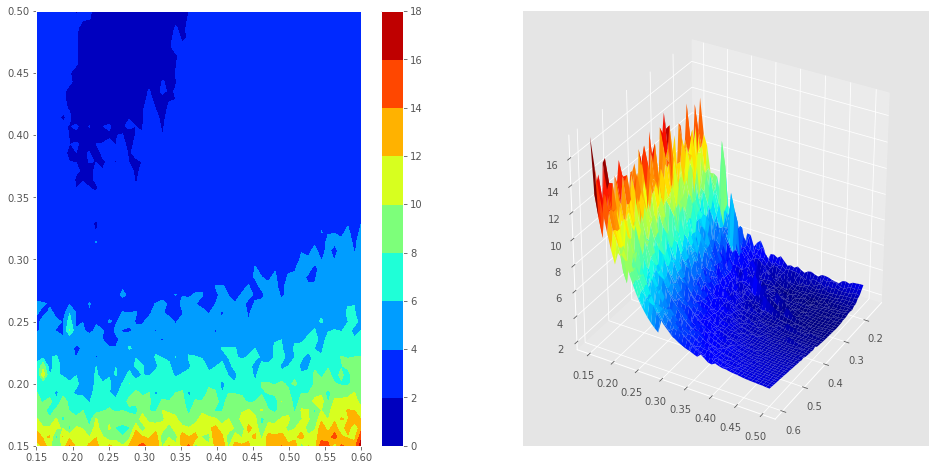

In [5]:
# Plot the grid search results
for key in grid.keys():
    fig = plt.figure(figsize=(16,8))
    plt.subplot(121)
    X, Y = grid[key]
    Z = results[key]
    cs = plt.contourf(X,Y,Z,cmap='jet')
    fig.colorbar(cs)
    
    # ax = fig.add_subplot(122, projection='3d')
    # ax.plot_wireframe(X,Y,Z)

    ax = fig.add_subplot(122, projection='3d')
    ax.view_init(30, 30)
    ax.plot_surface(X,Y,Z,cmap='jet')

plt.show()

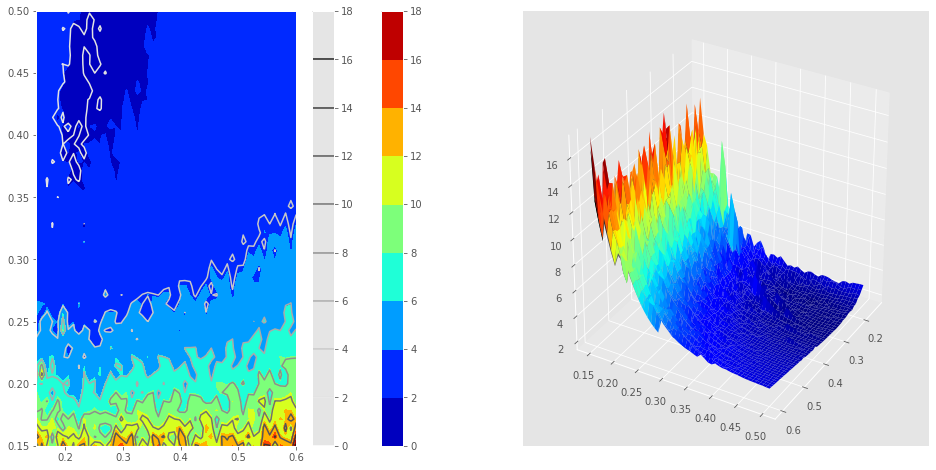

In [6]:
# Compare the noisy and ideal surfaces
for key in grid.keys():
    fig = plt.figure(figsize=(16,8))
    plt.subplot(121)
    X, Y = grid[key]
    
    Z = results[key]
    Z_noisy = results_noisy[key]

    cs = plt.contourf(X,Y,Z,cmap='jet')
    csn = plt.contour(X,Y,Z_noisy,cmap='binary')
    fig.colorbar(cs)
    fig.colorbar(csn)
    
    ax = fig.add_subplot(122, projection='3d')
    ax.view_init(30, 30)
    ax.plot_surface(X,Y,Z,cmap='jet')
    ax.plot_surface(X,Y,Z_noisy,cmap='binary')

plt.show()

In [8]:
# Optimize the model parameters
cal = ModelParameterOptimizer(lb=[0.15, 0.15], ub=[0.5, 0.6])
model_cal = SemiBatchReactor(k=[0.053, 0.128, 0.0, 0.0, 5])
_, x_cal, _ = cal.Run(model_cal, F, samples)
_, x_cal_noisy, _ = cal.Run(model_cal, F, samples_noisy)
model_adjusted = SemiBatchReactor(k=[x_cal[0], x_cal[1], 0, 0, 5])

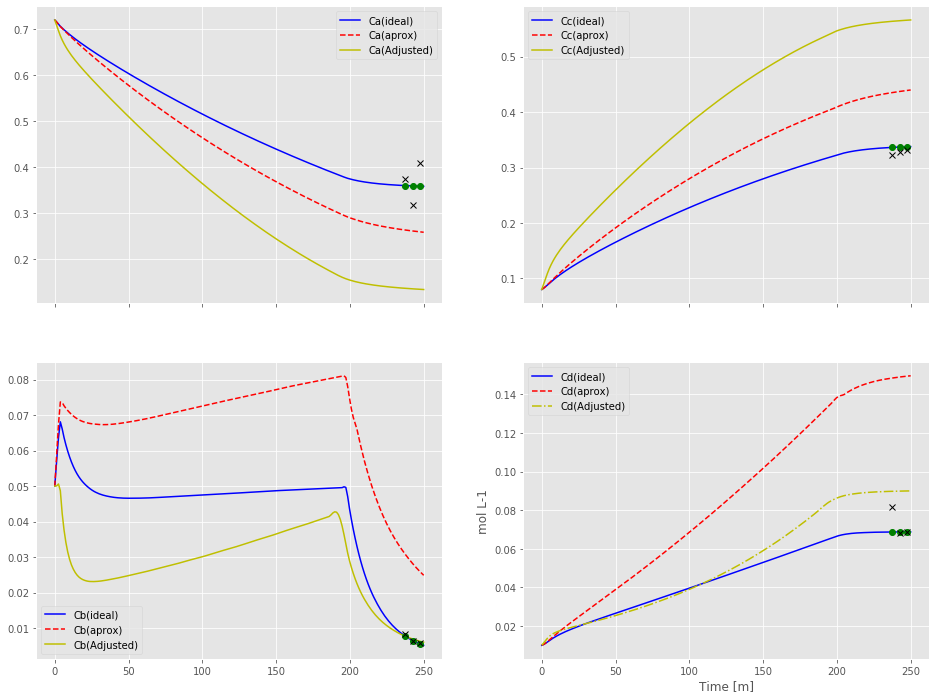

In [12]:
# Plot the process curves after adjustment
# Simulate the solution found
sim_adjusted = model_adjusted.Simulate(F)

# Plot the optimal simulation profiles
fig, (ax1, ax2) = plt.subplots(2, 2, sharex=True,figsize=(16,12))

ax1[0].plot(sim_ideal.t, sim_ideal.y[0], 'b')
ax1[0].plot(sim_aprox.t, sim_aprox.y[0], 'r--')
ax1[0].plot(sim_adjusted.t, sim_adjusted.y[0], 'y-')
ax1[0].plot(np.array(list(samples.keys())) * 250, np.array(list(samples.values()))[:,0], 'go')
ax1[0].plot(np.array(list(samples_noisy.keys())) * 250, np.array(list(samples_noisy.values()))[:,0], 'kx')
ax1[0].legend(['Ca(ideal)','Ca(aprox)','Ca(Adjusted)'])

ax1[1].plot(sim_ideal.t, sim_ideal.y[2], 'b')
ax1[1].plot(sim_aprox.t, sim_aprox.y[2], 'r--')
ax1[1].plot(sim_adjusted.t, sim_adjusted.y[2], 'y-')
ax1[1].plot(np.array(list(samples.keys())) * 250, np.array(list(samples.values()))[:,2], 'go')
ax1[1].plot(np.array(list(samples_noisy.keys())) * 250, np.array(list(samples_noisy.values()))[:,2], 'kx')
ax1[1].legend(['Cc(ideal)','Cc(aprox)','Cc(Adjusted)'])

ax2[0].plot(sim_ideal.t, sim_ideal.y[1], 'b')
ax2[0].plot(sim_aprox.t, sim_aprox.y[1], 'r--')
ax2[0].plot(sim_adjusted.t, sim_adjusted.y[1], 'y-')
ax2[0].plot(np.array(list(samples.keys())) * 250, np.array(list(samples.values()))[:,1], 'go')
ax2[0].plot(np.array(list(samples_noisy.keys())) * 250, np.array(list(samples_noisy.values()))[:,1], 'kx')
ax2[0].legend(['Cb(ideal)','Cb(aprox)','Cb(Adjusted)'])

ax2[1].plot(sim_ideal.t, sim_ideal.y[3], 'b')
ax2[1].plot(sim_aprox.t, sim_aprox.y[3], 'r--')
ax2[1].plot(sim_adjusted.t, sim_adjusted.y[3], 'y-.')
ax2[1].plot(np.array(list(samples.keys())) * 250, np.array(list(samples.values()))[:,3], 'go')
ax2[1].plot(np.array(list(samples_noisy.keys())) * 250, np.array(list(samples_noisy.values()))[:,3], 'kx')
ax2[1].legend(['Cd(ideal)','Cd(aprox)','Cd(Adjusted)'])

plt.xlabel('Time [m]')
plt.ylabel('mol L-1')
plt.show()